In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('datasets/near_miss_3.csv')
df.head()

,neo,a,e,om,w,q,ad,H,moid,n,ma,pha
0,1.0,1.686416,0.544965,245.630092,21.384899,0.767378,2.605454,24.712,0.023460,0.450046,26.058960,0.0
1,1.0,1.736779,0.296522,96.186590,359.854767,1.221786,2.251772,20.600,0.238695,0.430613,310.283723,0.0
2,1.0,1.668075,0.303145,1.199790,17.304849,1.162406,2.173744,23.000,0.167968,0.457489,205.863120,0.0
3,1.0,2.393052,0.483983,154.581023,349.824964,1.234855,3.551249,20.000,0.248220,0.266242,56.906622,0.0
4,0.0,2.417010,0.403566,150.424608,352.351814,1.441586,3.392434,21.701,0.455161,0.262293,11.626462,0.0


In [35]:
df.iloc[:,1:-1].describe()

,a,e,om,w,q,ad,H,moid,n,ma
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,1.808513,0.476715,179.146105,181.580240,0.878598,2.738429,21.031587,0.091840,0.515086,180.617683
std,0.986419,0.183299,105.739333,102.605875,0.280200,1.934527,2.579829,0.126636,0.296657,103.512452
min,0.579850,0.012077,0.086611,0.240372,0.081882,0.956023,12.600000,0.000025,0.002816,0.034200
25%,1.301165,0.344098,86.124087,92.395288,0.708828,1.777474,19.400000,0.014748,0.292966,92.141900
50%,1.773974,0.485701,177.041891,184.742491,0.908038,2.624801,20.700000,0.033916,0.417141,180.191601
75%,2.245215,0.607135,271.903743,272.034904,1.032256,3.525739,22.000000,0.109084,0.664057,270.267915
max,49.661585,0.995869,359.849201,359.854767,1.509081,99.118039,30.900000,0.499800,2.232189,359.989549


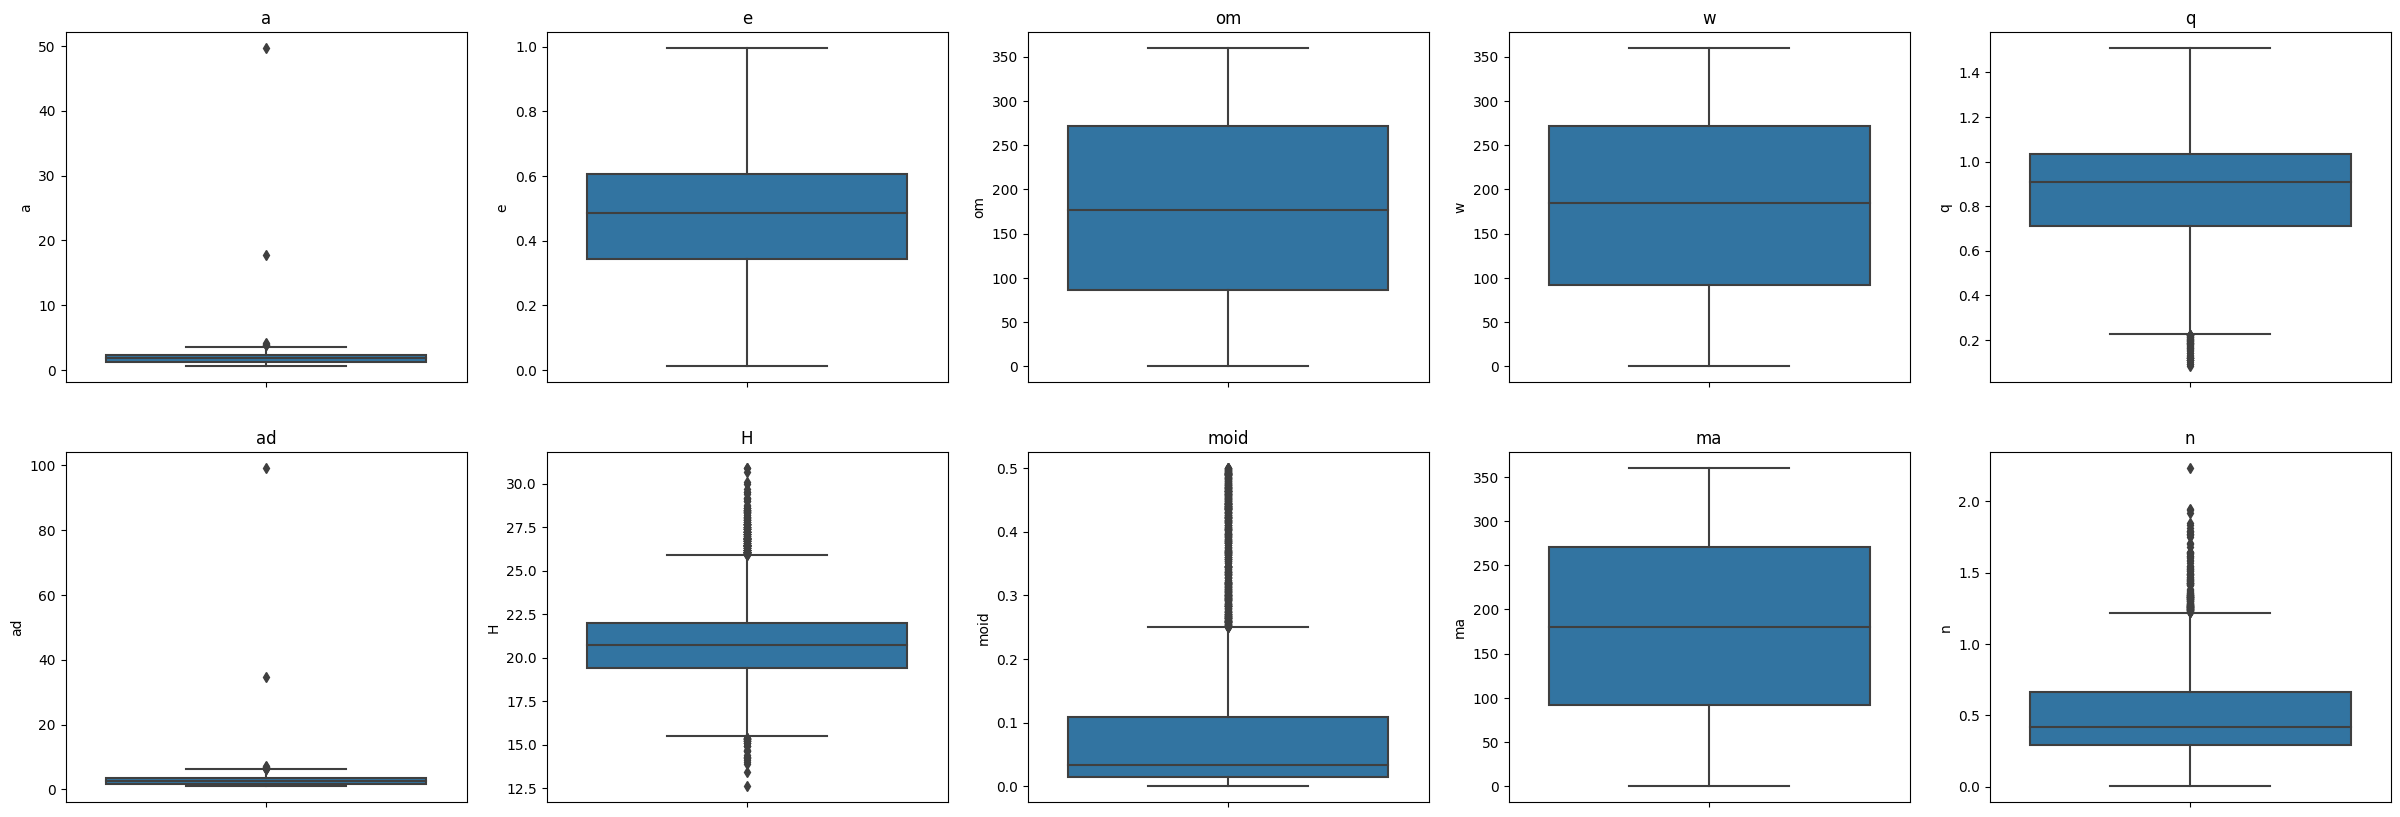

In [36]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm3/dist_with_outliers_raw.png')
plt.show()

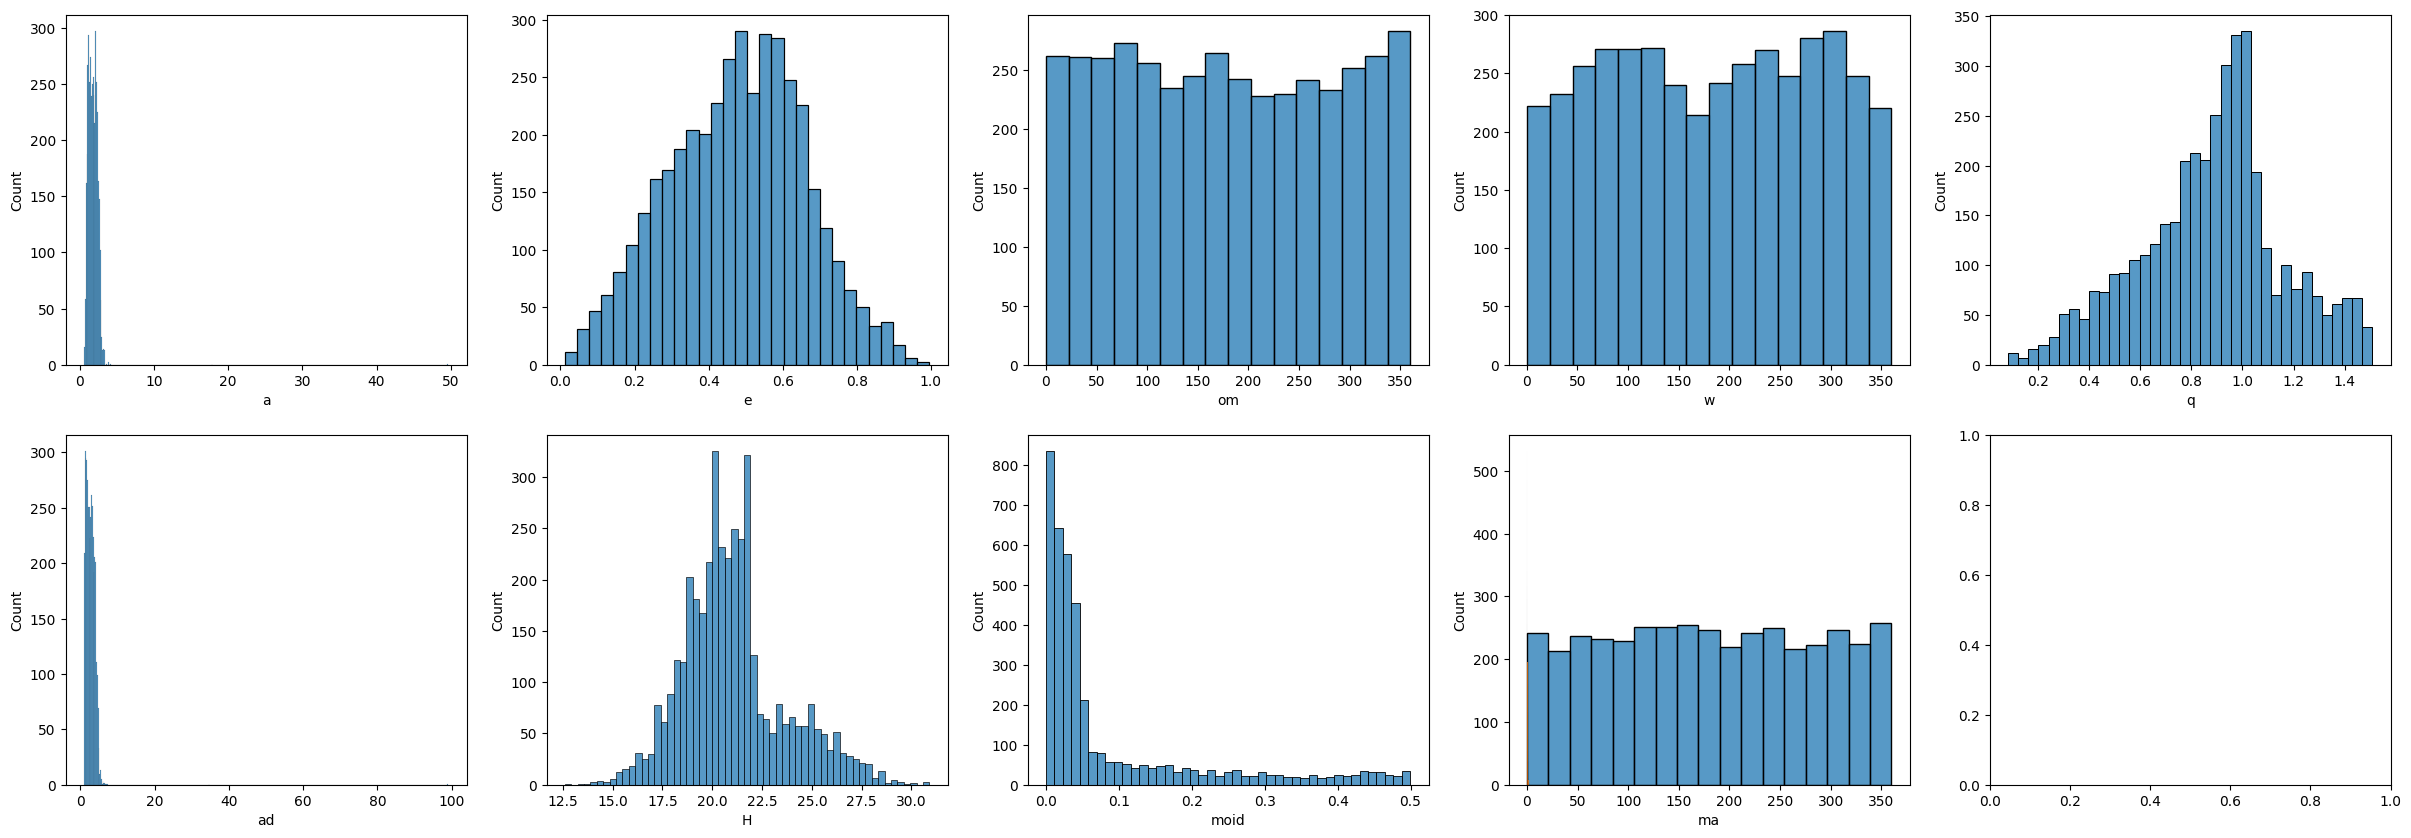

In [37]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm3/hist_with_outliers_raw.png')
plt.show()

In [38]:
col_names = list(df.columns.values)

for c_name in col_names[1:-1]:
    quant_25 = df[c_name].quantile(0.25)
    quant_75 = df[c_name].quantile(0.75)
    iqr = quant_75 - quant_25
    outliers = [True if (val < quant_25-(1.5*iqr) or val > quant_75+(1.5*iqr)) else False for val in df[c_name]]
    
    
    df[c_name] = np.where(outliers, np.nan, df[c_name])

In [39]:
for c_name in col_names[1:-1]:
    grouped_mean = df.groupby(["neo", "pha"])[c_name].quantile(0.50)
    neo0 = [val[0] and val[1] for val in zip(df[c_name].isna(),df['neo'] == 0)]
    neo1_pha0 = [val[0] and val[1] and val[2] for val in zip(df[c_name].isna(), df['neo'] == 1, df['pha'] == 0 )]

    df[c_name] = np.where(neo0, grouped_mean[0][0], df[c_name])
    df[c_name] = np.where(neo1_pha0, grouped_mean[1][0], df[c_name])
    df[c_name] = np.where(df[c_name].isna(), grouped_mean[1][1], df[c_name])

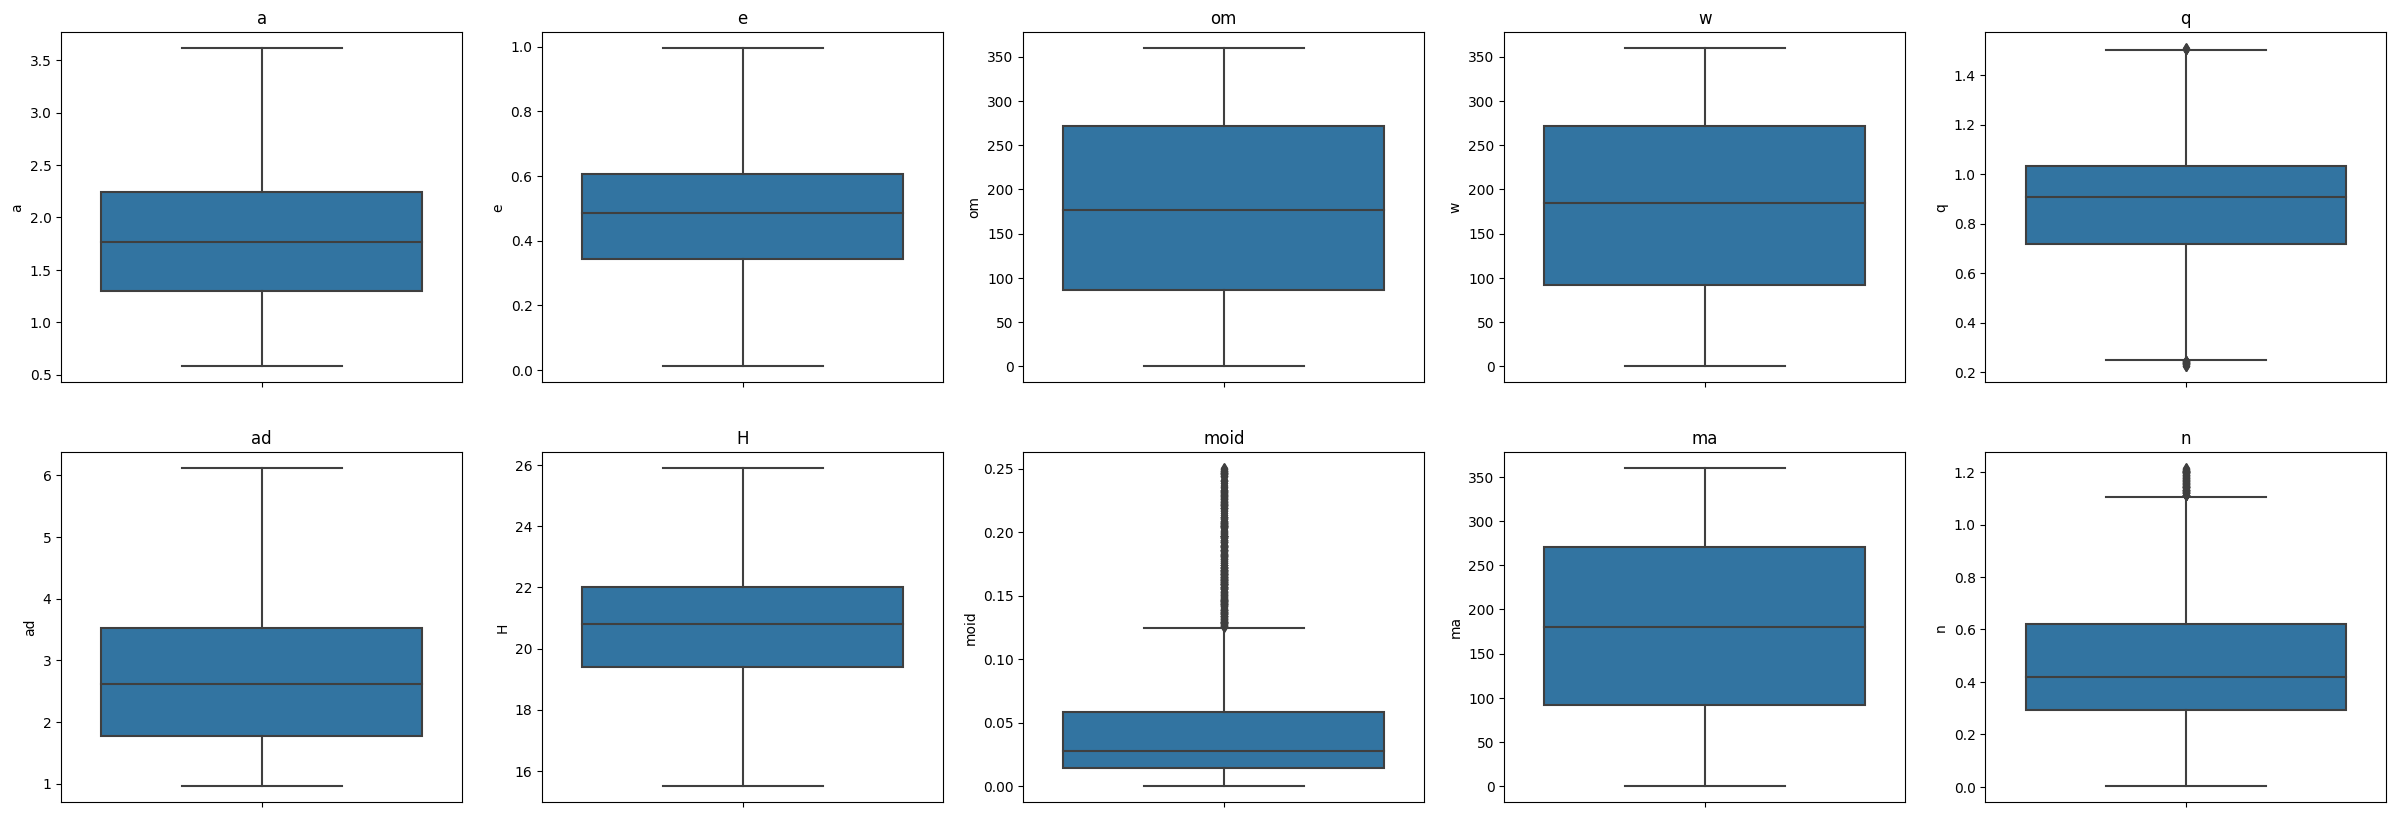

In [40]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm3/dist_without_outliers.png')
plt.show()

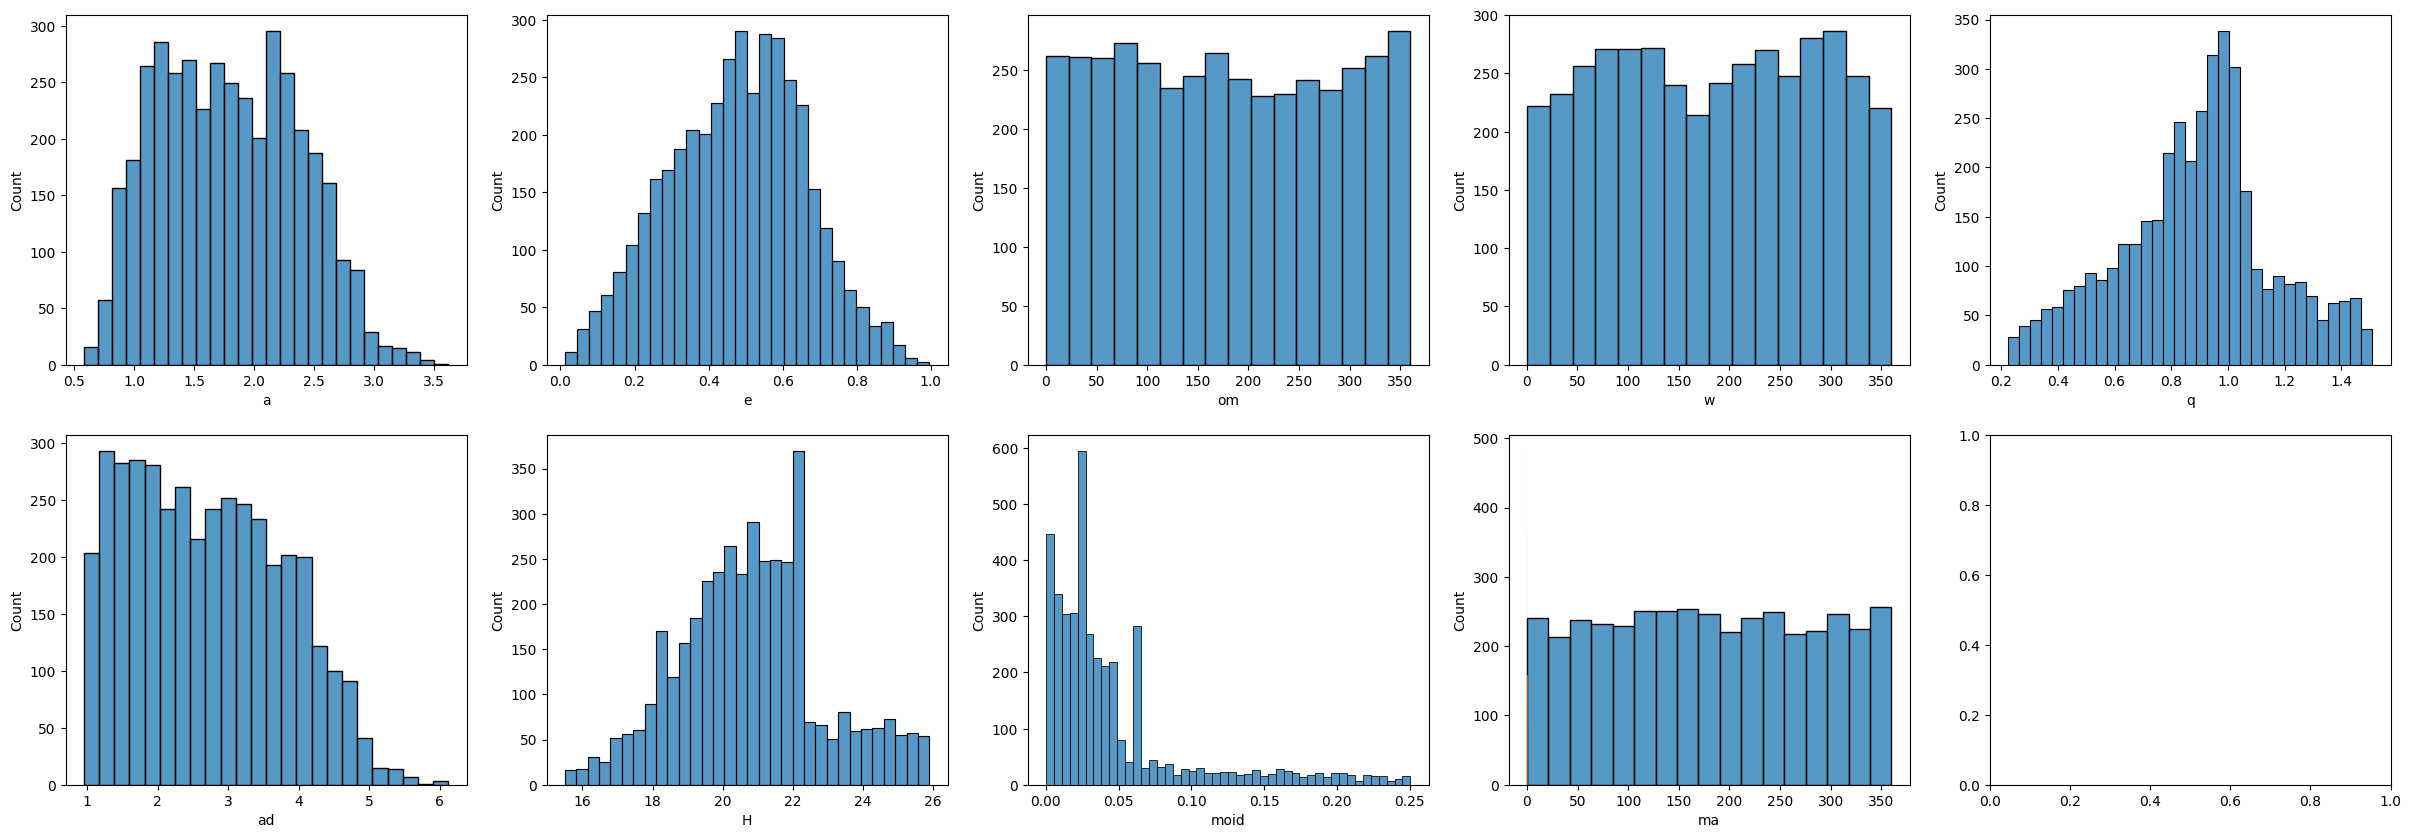

In [41]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm3/hist_without_outliers.png')
plt.show()

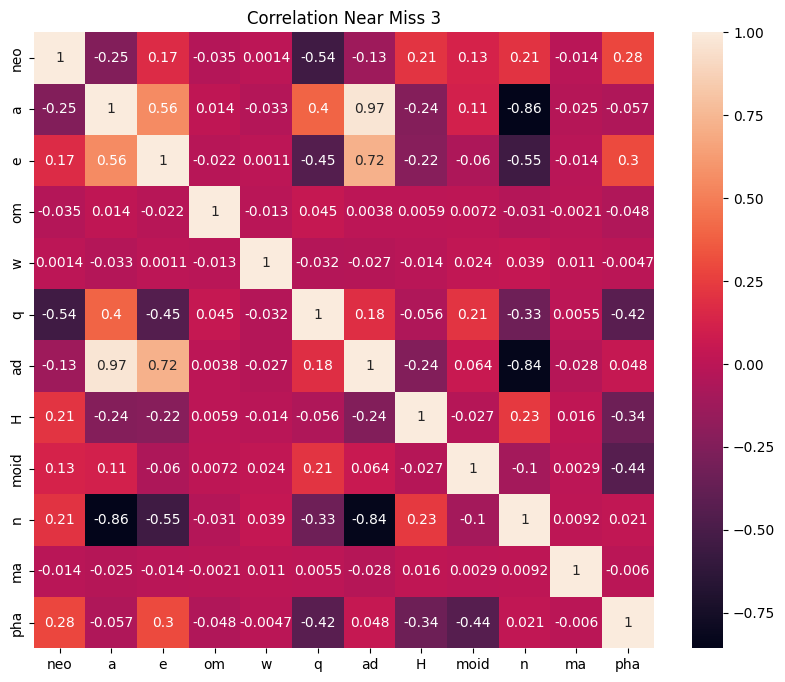

In [42]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Near Miss 3')
plt.savefig('plots/nm3/corr_heatmap.png')

In [43]:
working_df = df[['neo','e','q','pha']]
working_df.head()

,neo,e,q,pha
0,1.0,0.544965,0.767378,0.0
1,1.0,0.296522,1.221786,0.0
2,1.0,0.303145,1.162406,0.0
3,1.0,0.483983,1.234855,0.0
4,0.0,0.403566,1.441586,0.0


In [44]:
from sklearn.model_selection import train_test_split

X = working_df.drop('pha', axis='columns')
y = working_df['pha']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X, y)

for val in zip(pvalues, working_df.columns): print(f'{val[1]}:\t{val[0]}')

neo:	1.1678214646125685e-06
e:	4.6281640308339154e-07
q:	1.3474141297591867e-14


In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf

## SMV linear

Accuracy: 0.71
Sensitivity: 0.73
Specificty: 0.68


<AxesSubplot: >

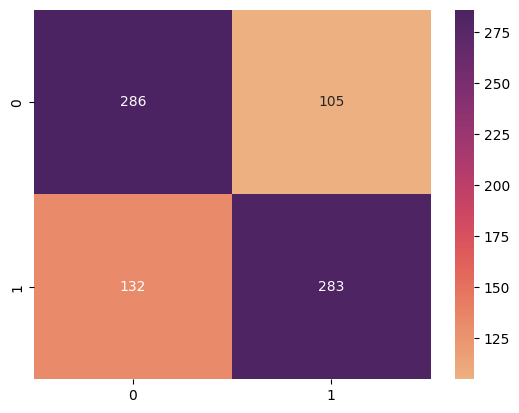

In [48]:
svc_linear = SVC(kernel='linear', random_state=0).fit(X_train_std, y_train)
y_pred = svc_linear.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [49]:
accuracies = cross_val_score(estimator=svc_linear, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 70.50%
Standard Deviation: 1.96%


## SVM rbf

Accuracy: 0.73
Sensitivity: 0.84
Specificty: 0.67


<AxesSubplot: >

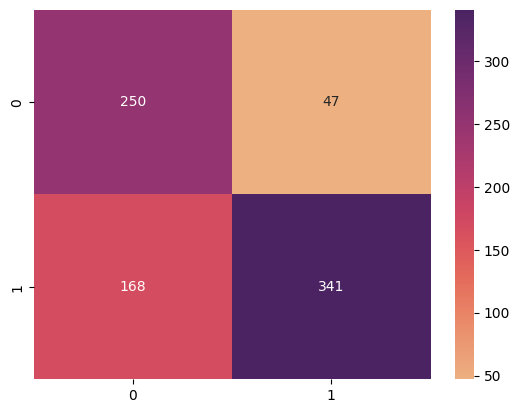

In [50]:
svc_rbf = SVC(kernel='rbf', random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [51]:
accuracies = cross_val_score(estimator=svc_rbf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 73.88%
Standard Deviation: 2.19%


## SVM best model

In [52]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

gs = GridSearchCV(estimator=svc_linear, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 74.26%
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


## Random Forest

Accuracy: 0.73
Sensitivity: 0.85
Specificty: 0.66


<AxesSubplot: >

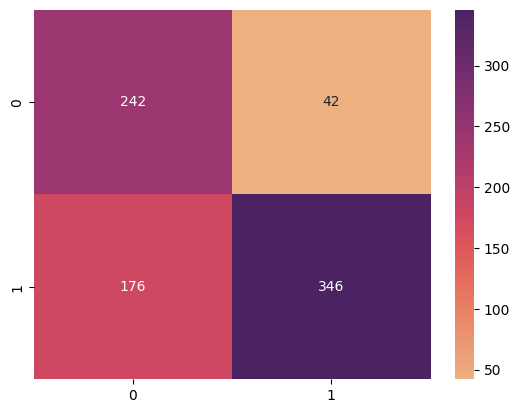

In [53]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [54]:
accuracies = cross_val_score(estimator=rf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 74.04%
Standard Deviation: 1.94%


## Best Random Forest

In [55]:
parameters = [{'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7, 9], 'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180, 200]}]

gs = GridSearchCV(estimator=rf, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 74.23%
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60}


## KNN

Accuracy: 0.70
Sensitivity: 0.76
Specificty: 0.66


<AxesSubplot: >

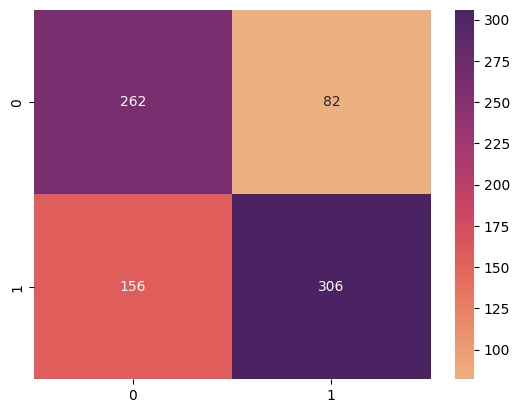

In [56]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [57]:
accuracies = cross_val_score(estimator=knn, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 69.51%
Standard Deviation: 1.80%


## Best KNN

In [58]:
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}]

gs = GridSearchCV(estimator=knn, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 72.58%
Best Parameters: {'n_neighbors': 21}


## ANN

In [59]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_std, y_train, batch_size=32, epochs=100)

Epoch 1/100
101/101 [==============================] - 0s 550us/step - loss: 1.0149 - accuracy: 0.3396
Epoch 2/100
101/101 [==============================] - 0s 570us/step - loss: 0.9103 - accuracy: 0.2953
Epoch 3/100
101/101 [==============================] - 0s 570us/step - loss: 0.8438 - accuracy: 0.2928
Epoch 4/100
101/101 [==============================] - 0s 610us/step - loss: 0.7981 - accuracy: 0.3154
Epoch 5/100
101/101 [==============================] - 0s 590us/step - loss: 0.7658 - accuracy: 0.3635
Epoch 6/100
101/101 [==============================] - 0s 570us/step - loss: 0.7405 - accuracy: 0.4358
Epoch 7/100
101/101 [==============================] - 0s 570us/step - loss: 0.7180 - accuracy: 0.4953
Epoch 8/100
101/101 [==============================] - 0s 570us/step - loss: 0.6956 - accuracy: 0.5583
Epoch 9/100
101/101 [==============================] - 0s 560us/step - loss: 0.6743 - accuracy: 0.5974
Epoch 10/100
101/101 [==============================] - 0s 570us/step - l

In [60]:
def metrics(cf_matrix):
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1])/(cf_matrix[0,0]+cf_matrix[1,0]+cf_matrix[0,1]+cf_matrix[1,1])
    precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    specificity = cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[1,0])

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificty: {specificity:.2f}')

# BEST MODELS

Accuracy: 0.73
Precision: 0.60
Sensitivity: 0.60
Specificty: 0.67


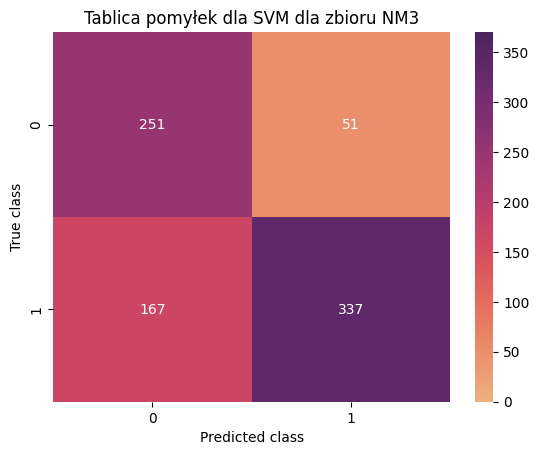

In [70]:
svc_rbf = SVC(kernel='rbf', C=0.1, gamma=0.9, random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla SVM dla zbioru NM3')
plt.savefig('conf_matrix/nm3_svm.png')

Accuracy: 0.73
Precision: 0.58
Sensitivity: 0.58
Specificty: 0.66


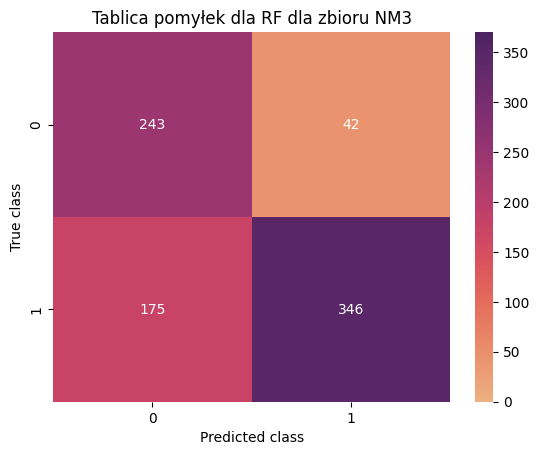

In [71]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=60, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla RF dla zbioru NM3')
plt.savefig('conf_matrix/nm3_rf.png')

Accuracy: 0.73
Precision: 0.60
Sensitivity: 0.60
Specificty: 0.67


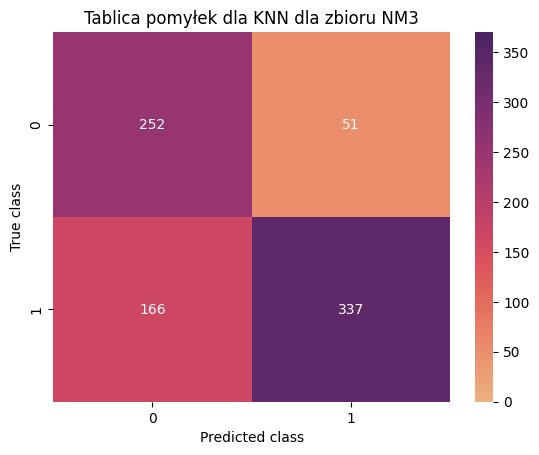

In [72]:
knn = KNeighborsClassifier(n_neighbors=21, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla KNN dla zbioru NM3')
plt.savefig('conf_matrix/nm3_knn.png')

26/26 [==============================] - 0s 480us/step
Accuracy: 0.72
Precision: 0.58
Sensitivity: 0.58
Specificty: 0.66


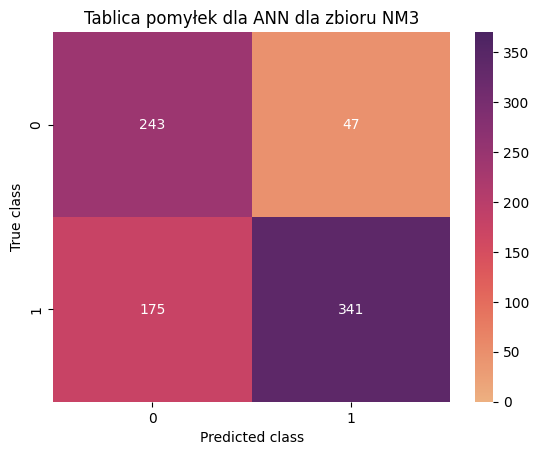

In [73]:
y_predict = ann.predict(X_test_std)
y_pred = (y_predict > 0.5)

matr = cf_matrix=confusion_matrix(y_pred, y_test)

metrics(matr)
plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla ANN dla zbioru NM3')
plt.savefig('conf_matrix/nm3_ann.png')